<a href="https://colab.research.google.com/github/Bhoomikadayal/casptone-project---2-Regression/blob/main/Bike_Sharing_Demand_Remake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Name** - Bhoomika
##### **Team Member -**  Bhoomika Dayal

# **GitHub Link -**

##### **Team Member  -**  Bhoomika Dhayal
https://github.com/Bhoomikadayal/casptone-project---2-Regression.git

# **Project Summary -**

According to recent studies, it is expected that more than 60% of the population in the world tends to goes toward cities.

Bike-sharing MOD systems are already firmly holding the effective part in short commuting for short trips in several cities. There are certain issues in the maintenance, design, and management of bike-sharing systems (ex :- layout of the station design; fleet size and capacity of the station; detecting broken, lost, or theft bikes; pricing; monitoring of traffic and customer activities to promote behaviour virtuously; and marketing using campaigns etc).

System balancing is the hardest policies.
Today, bike-sharing systems are blooming across more cities around the world. To complete a short trip renting a bike is a better way as compared to walking. It is eco-friendly and comfortable too compared to driving.

Data which is collected from a rented bike provider company form Seoul to get analysed, involves usage details of customers from.  The data was taken from rented bike Provider Company. It has 8760 rows and 14 columns. Most columns related to hourly bike count for rent. Other column was indicative of weather condition affecting bike count per hour.

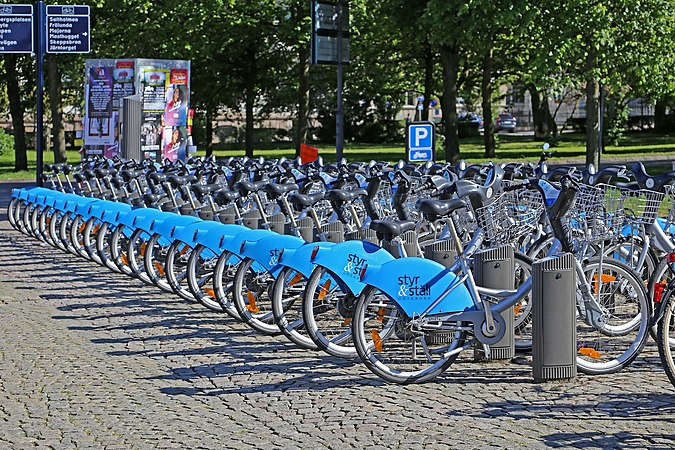

# **Problem Statement**

### The main goal of the project is to: Finding factors and cause those influence shortage of bike and time delay of availing bike on rent.

#### 1. To make  maximize the availability of bikes to the customer.
#### 2. Minimize the time of waiting to get a bike on rent.
#### 3. The final aim of this project is the prediction of bike count required at each hour for the stable supply of rental bikes.
#### 4. Using the data provided, this paper aims to analyze the data to determine what variables are correlated with customer churn, if any. Hourly count of bike for rent will also be predicted

# **Business Understanding**

#### 1. A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.
#### 2. Rental Bike Sharing is the process by which bicycles are procured on several basis- hourly, weekly, membership-wise, etc.
#### 3. Today, bike-sharing systems are blooming across more cities around the world. To complete a short trip renting a bike is a faster way when compared to walking
#### 4. Mostly used by those people having no personal vehicle and avoid public transport and private cabs , so they prefer rental bikes
#### 5. In our project, we chose to analyses a dataset pertaining to Rental Bike Demand from South Korean city of Seoul.

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>

  #### Date:   The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formatting in DD/MM/YYYY, we need to convert into date-time format.
 #### Rented Bike Count:   Number of rented bikes per hour which our dependent variable and we need to predict that
 #### Hour:   The hour of the day, starting from 0-23 it's in a digital time format
 #### Temperature (°C):    Temperature of the weather in Celsius and it varies from -17°C to 39.4°C.
 #### Humidity (%):   Availability of Humidity in the air during the booking and ranges from 0 to 98%.
 #### Wind speed (m/s):   Speed of the wind while booking and ranges from 0 to 7.4m/s.
 #### Visibility (10m):  Visibility to the eyes during driving in “m” and ranges from 27m to 2000m.
 #### Dew point temperature (°C):   Temperature  At the beginning of the day and it ranges from -30.6°C to 27.2°C.
 #### Solar Radiation (MJ/m2):    Sun contribution or solar radiation during ride booking which varies from 0 to 3.5 MJ/m2.
 #### Rainfall (mm):   The amount of rainfall during bike booking which ranges from 0 to 35mm.
 #### Snowfall (cm):   Amount of snowing in cm during the booking in cm and ranges from 0 to 8.8 cm.
 #### Seasons:  Seasons of the year and total there are 4 distinct seasons I.e. summer, autumn, spring and winter.
 #### Holiday:   If the day is holiday period or not and there are 2 types of data that is holiday and no holiday.

# ***Let's Begin !***

## ***1. Know Your Data***
### Dataset Loading from google drive and Import Libraries

In [1]:
# mount the dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the data set from drive
df=pd.read_csv("/content/drive/MyDrive/casptone project - 2 (Regression)/SeoulBikeData.csv", encoding="latin")

### Dataset First View

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
# Shape of data.

print(f' We have total {df.shape[0]} rows and {df.shape[1]} columns.')

 We have total 8760 rows and 14 columns.


### Dataset Rows & Columns count
it tells us that there is 8740 rows and 14 columns in that dataset

In [7]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


## <b>Preprocessing the data </b>


* Deal with null/missing values

* Deal with duplicate data

* Breaking date column

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
# Checking the null values of data.

df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [10]:
# Important columns names.

column=df.columns
column

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
# Description of data. (i.e statistical values)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [12]:
# Dataset Duplicate Value Count
a = df.duplicated().sum()
print(f"the duplicates values in data is {a}")

the duplicates values in data is 0


### What did you know about your dataset?

We found that there is no duplicates values in that data set and no null values that makes easy for prediction

In [13]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

##Breaking date column, creating a new column of  weekdays weekend column and droping unwanted columns which is not required.

In [14]:
# Changing the "Date" column into three "year","month","day" column
df['Date'] = df['Date'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d'))

In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'], df['month'] = df['Date'].dt.year, df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()

In [16]:
df['weekdays weekend']=df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

In [17]:
df=df.drop(columns=['Date','day','year'],axis=1)

In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int64

* ***So we convert the "date" column into 3 different column i.e "year","month","day".***
* ***The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it***.
* ***The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column***.

In [19]:
df['weekdays weekend'].value_counts()

0    6216
1    2544
Name: weekdays weekend, dtype: int64

##Changing data type

* ***As "Hour","month","weekdays_weekend" column are show as a integer data type but actually it is a category data tyepe. so we need to change this data tyepe if we not then, while doing the further anlysis and correleted with this then the values are not actually true so we can mislead by this.***

In [20]:
#Change the int64 column into catagory column
cols=['Hour','month','weekdays weekend']
for col in cols:
  df[col]=df[col].astype('category')

In [21]:
#let's check the result of data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   object  
 11  Holiday                    8760 non-null   object  
 12  Functioning Day            8760 non-null   object  
 13  month                      8760 n

# **Exploratory Data Analysis Of The Data Set**

**Why do we perform EDA?**
* ***An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.***

## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***


##**Analysation of categorical variables**

#### Chart - 1

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

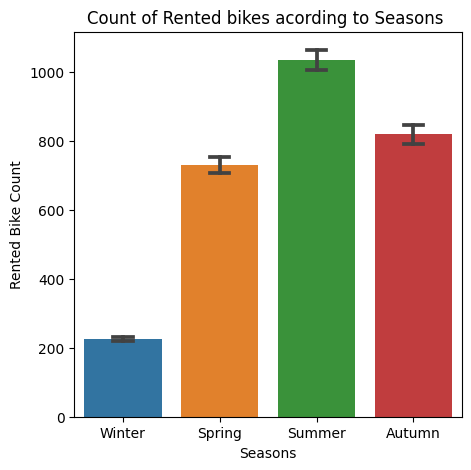

In [22]:
# Chart - 1 visualization code
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(5,5))
sns.barplot(data=df,x='Seasons',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

#### Conclusion : Summer season had the highest Bike Rent Count. People are more likely to take rented bikes in summer followed by Autumn and spring. Bike rentals in winter are very less compared to other seasons.

#### Chart - 2

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

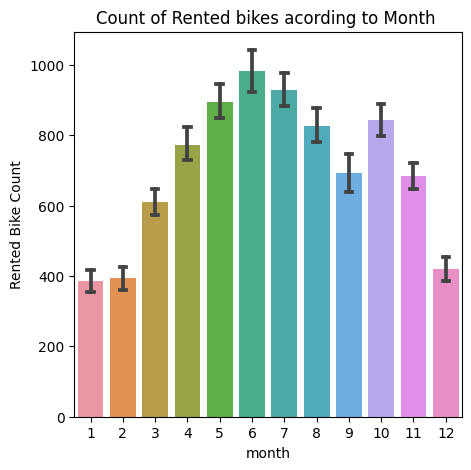

In [23]:
# Chart - 2 visualization code
fig,ax=plt.subplots(figsize=(5,5))
sns.barplot(data=df,x='month',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

####  Conclusion : From March Bike Rent Count started increasing and it was highest in June.

#### Chart - 3

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

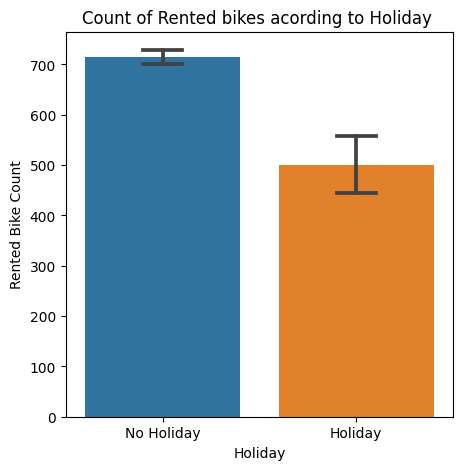

In [24]:
# Chart - 3 visualization code
fig,ax=plt.subplots(figsize=(5,5))
sns.barplot(data=df,x='Holiday',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

#### Conclusion: High number of bikes were rented on No Holidays. Which is almost 700 bikes.

#### Chart - 4

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

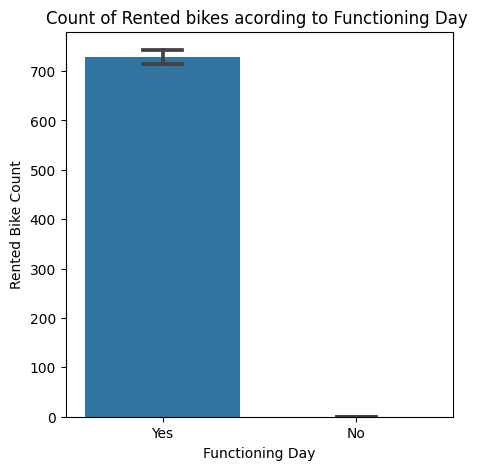

In [25]:
# Chart - 4 visualization code
fig,ax=plt.subplots(figsize=(5,5))
sns.barplot(data=df,x='Functioning Day',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

#### conclusion : Zero Bikes were rented on no functioning day.More than 700 bikes rented on functioning day.

#### Chart - 5

[Text(0.5, 1.0, '1 for saturday/sunday   0 :- foother days ')]

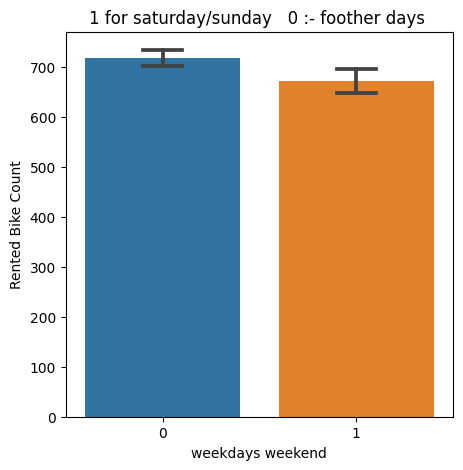

In [26]:
# Chart - 5 visualization code
fig,ax=plt.subplots(figsize=(5,5))
sns.barplot(data=df,x='weekdays weekend',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='1 for saturday/sunday   0 :- foother days ')

#### conclusion : More than 700 bikes were rented on weekdays. On weekend, almost 650 bikes were rented.

#### Chart - 6

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

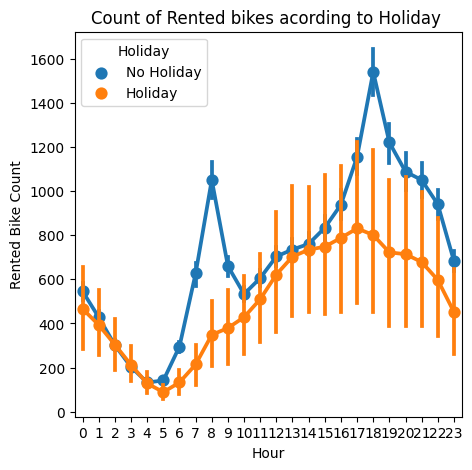

In [27]:
# Chart - 6 visualization code
fig,ax=plt.subplots(figsize=(5,5))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

#### There is sudden peak between 6/7AM to 10 AM. Office /College going time could be the reason for this sudden peak on NO Holiday. But on Holiday the case is different,very less bike rentals happened.

 #### Again there is peak between 4PM to 7 PM. may be its office leaving time for the above people.( NO Holiday).


#### Chart - 7

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

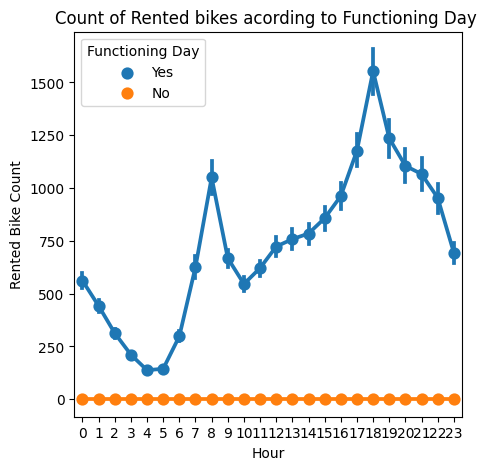

In [28]:
# Chart - 7 visualization code
fig,ax=plt.subplots(figsize=(5,5))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Functioning Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

#### conclusion : Here the trend for functioning day is same as of No holiday. Only the difference is on No functioning day there were zero bike rentals.

#### Chart - 8

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

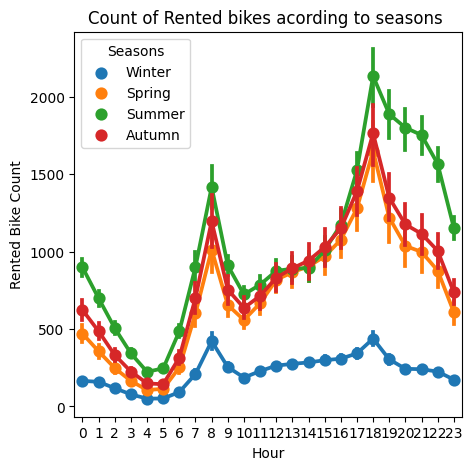

In [29]:
# Chart - 8 visualization code
fig,ax=plt.subplots(figsize=(5,5))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

#### In summer season the use of rented bike is high and peak time is 7am-9am and 7pm-5pm
#### In winter season the use of rented bike is very low because of snowfall

#### Chart - 9

[Text(0.5, 1.0, '1 for sunday/saturday   0 for other day ')]

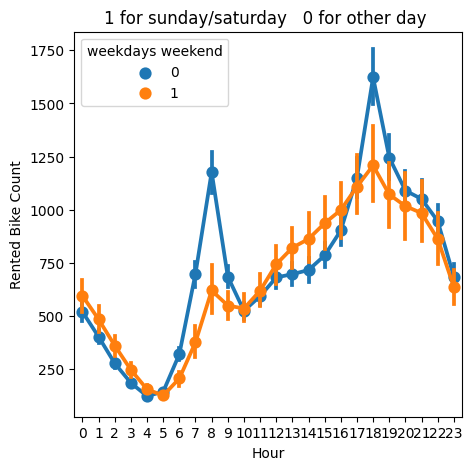

In [30]:
# Chart - 9 visualization code
fig,ax=plt.subplots(figsize=(5,5))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='weekdays weekend',ax=ax)
ax.set(title='1 for sunday/saturday   0 for other day ')

#### We can say that the demand for the bike is higher during the weekdays, which are represented by the blue line graph, because of the office hours of 7 a.m. to 9 a.m. and 5 p.m. to 7 p.m. The orange line represents weekend days, and it shows that demand for rented bikes is very low from 0 to 11, increases from 11 to 17, and then begins to decline until 23.

#### Analyze of Numerical variables distplots

In [31]:
#assign the numerical coulmn to variable
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

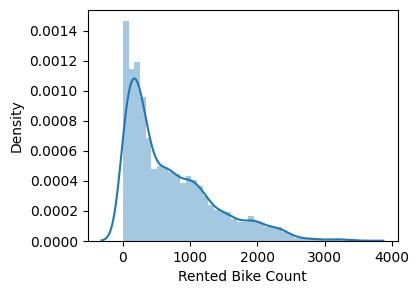

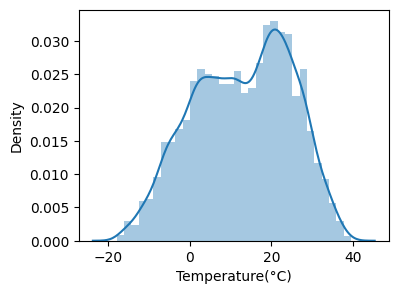

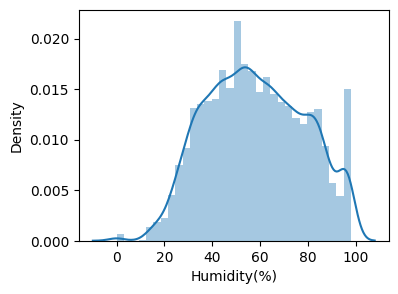

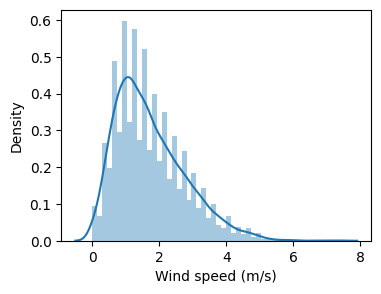

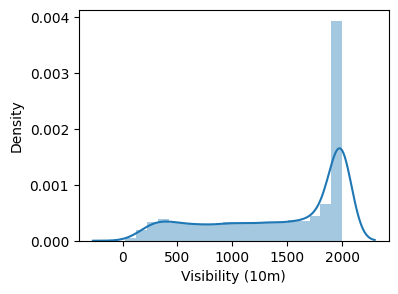

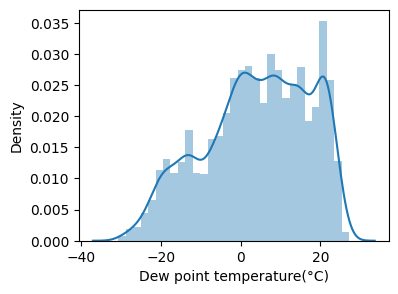

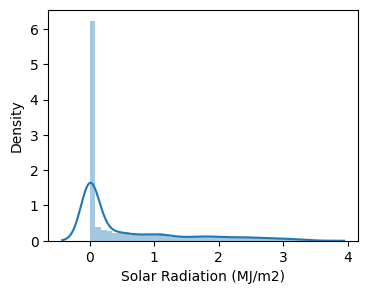

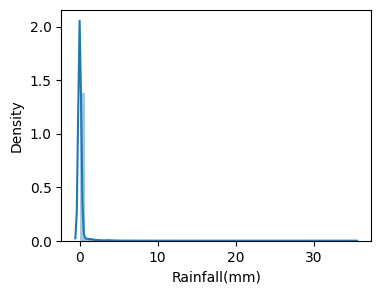

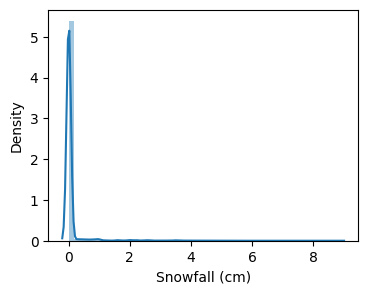

In [32]:
# it print all displots to check skewness and  the distribution of all numerical features
for col in numerical_features:
  plt.figure(figsize=(4,3))
  sns.distplot(x=df[col])
  plt.xlabel(col)
plt.show()

* ***we see that people like to ride bikes when it is pretty hot around 25°C in average***
* ***of "Dew point temperature' is almost same as the 'temperature' there is some similarity present we can check it in our next step.***
* ***we see that, the amount of rented bikes is huge, when there is solar radiation, the counter of rents is around 1000***
* ***We see that, on the y-axis, the amount of rented bike is very low When we have more than 4 cm of snow, the bike rents is much lower***
* ***We see that even if it rains a lot the demand of of rent bikes is not decreasing, here for example even if we have 20 mm of rain there is a big peak of rented bikes***
* ***We can see from the above plot that the demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind was 7 m/s then the demand of bike also increase that clearly means peoples love to ride bikes when its little windy.***

#### Numerical vs.Rented_Bike_Count

<Axes: xlabel='Temperature(°C)'>

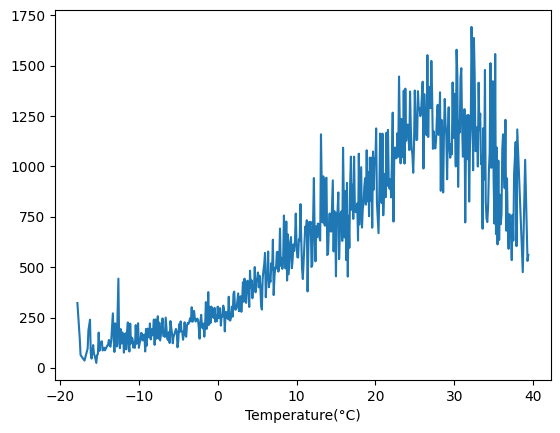

In [33]:
#print the plot to analyze the relationship between "Rented Bike Count" and "Temperature"
df.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot()

* ***From the above plot we see that people like to ride bikes when it is pretty hot around 25°C in average***

<Axes: xlabel='Dew point temperature(°C)'>

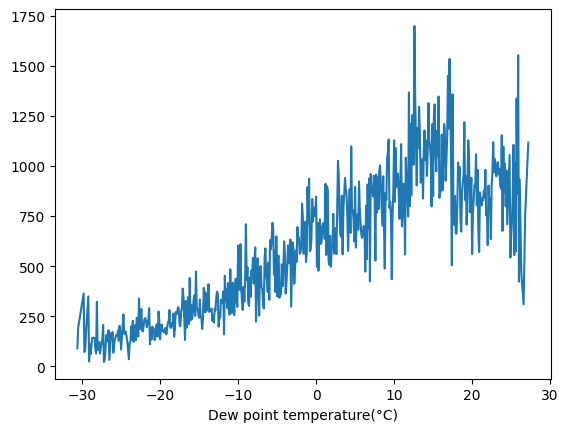

In [34]:
#print the plot to analyze the relationship between "Rented Bike Count" and "Dew point temperature"
df.groupby('Dew point temperature(°C)').mean()['Rented Bike Count'].plot()

* ***From the above plot of "Dew_point_temperature' is almost same as the 'temperature' there is some similarity present we can check it in our next step.***

<Axes: xlabel='Solar Radiation (MJ/m2)'>

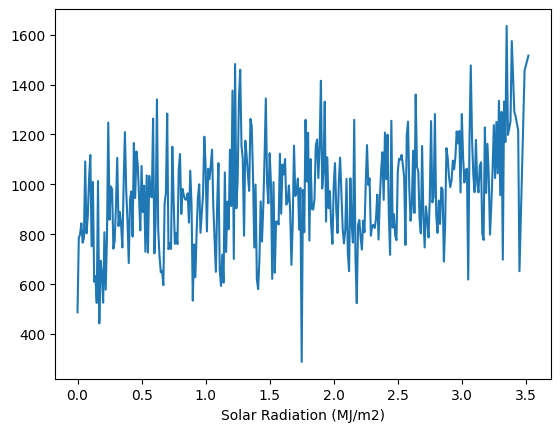

In [35]:
#print the plot to analyze the relationship between "Rented Bike Count" and "Solar Radiation"
df.groupby('Solar Radiation (MJ/m2)').mean()['Rented Bike Count'].plot()

* ***from the above plot we see that, the amount of rented bikes is huge, when there is solar radiation, the counter of rents is around 1000***

<Axes: xlabel='Snowfall (cm)'>

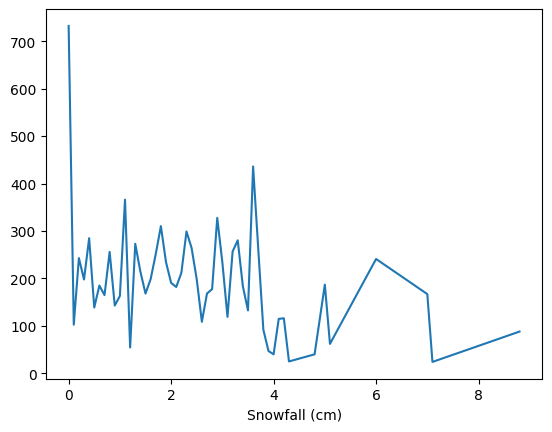

In [36]:
#print the plot to analyze the relationship between "Rented Bike Count" and "Snowfall"
df.groupby('Snowfall (cm)').mean()['Rented Bike Count'].plot()

* ***We can see from the plot that, on the y-axis, the amount of rented bike is very low When we have more than 4 cm of snow, the bike rents is much lower***

<Axes: xlabel='Rainfall(mm)'>

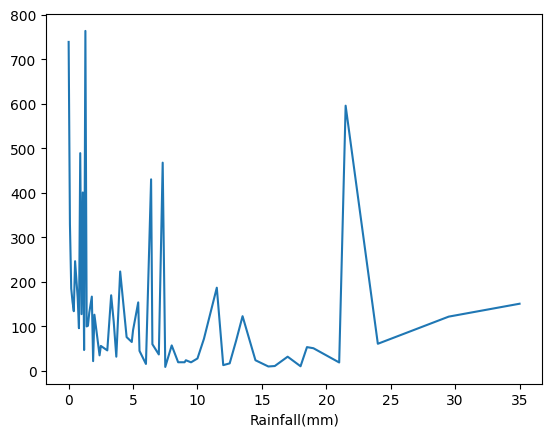

In [37]:
#print the plot to analyze the relationship between "Rented Bike Count" and "Rainfall"
df.groupby('Rainfall(mm)').mean()['Rented Bike Count'].plot()

* ***We can see from the above plot that even if it rains a lot the demand of of rent bikes is not decreasing, here for example even if we have 20 mm of rain there is a big peak of rented bikes***

<Axes: xlabel='Wind speed (m/s)'>

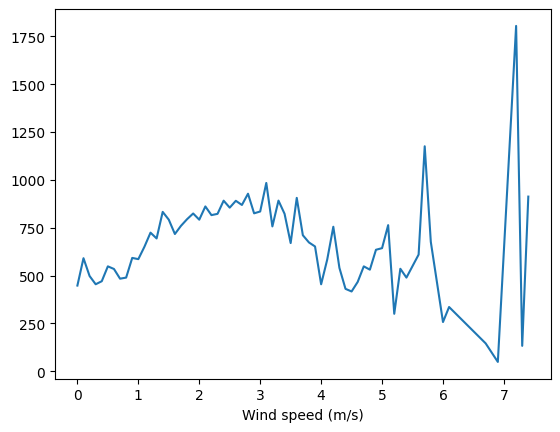

In [38]:
#print the plot to analyze the relationship between "Rented Bike Count" and "Wind speed"
df.groupby('Wind speed (m/s)').mean()['Rented Bike Count'].plot()

* ***We can see from the above plot that the demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind was 7 m/s then the demand of bike also increase that clearly means peoples love to ride bikes when its little windy.***

# **Regression plot**

***The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.***

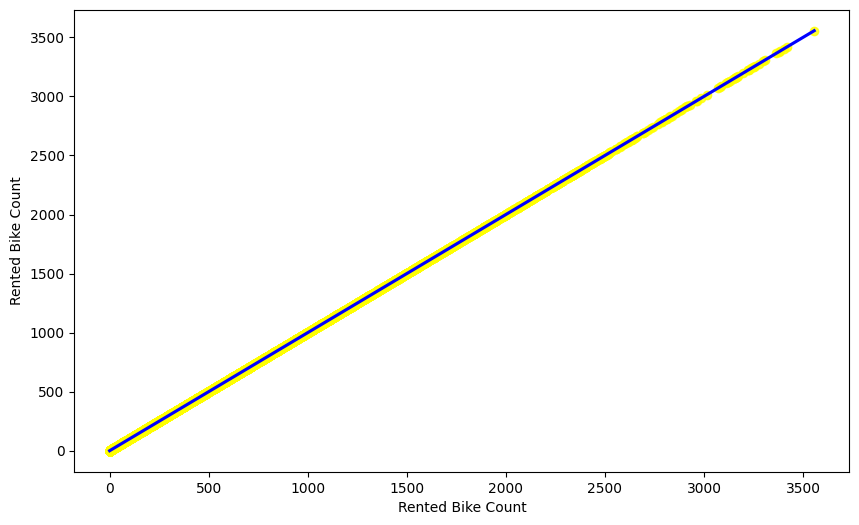

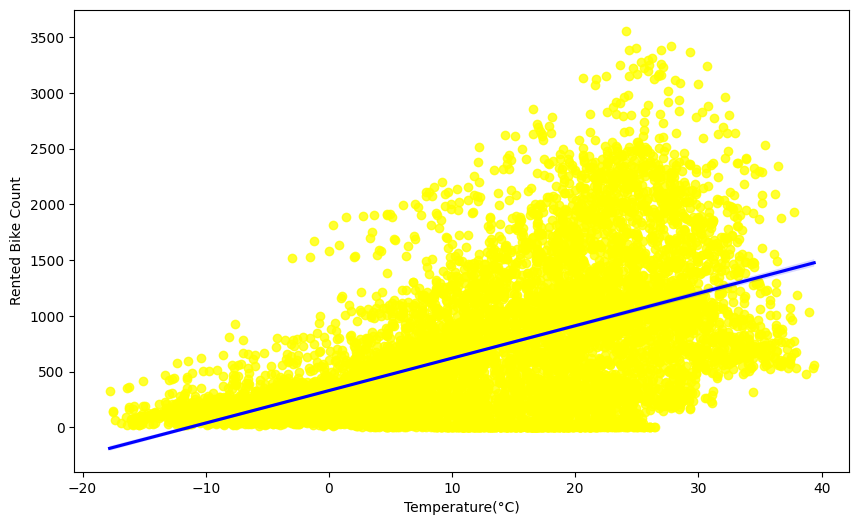

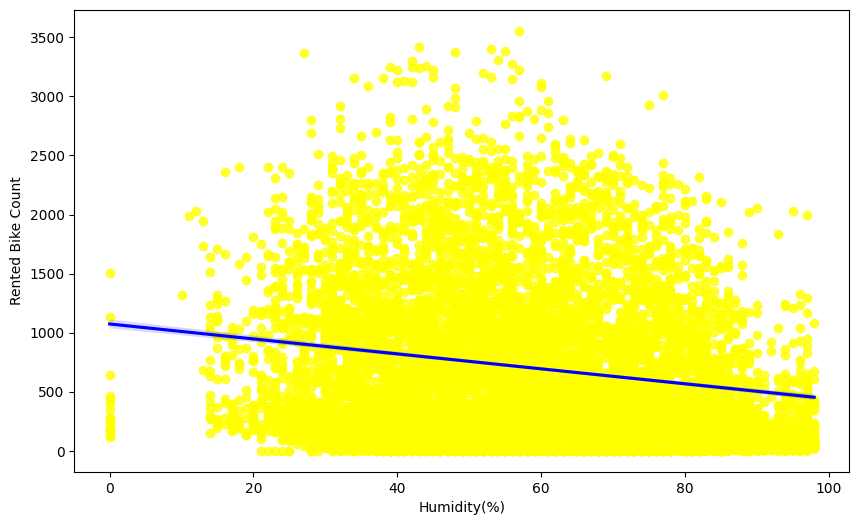

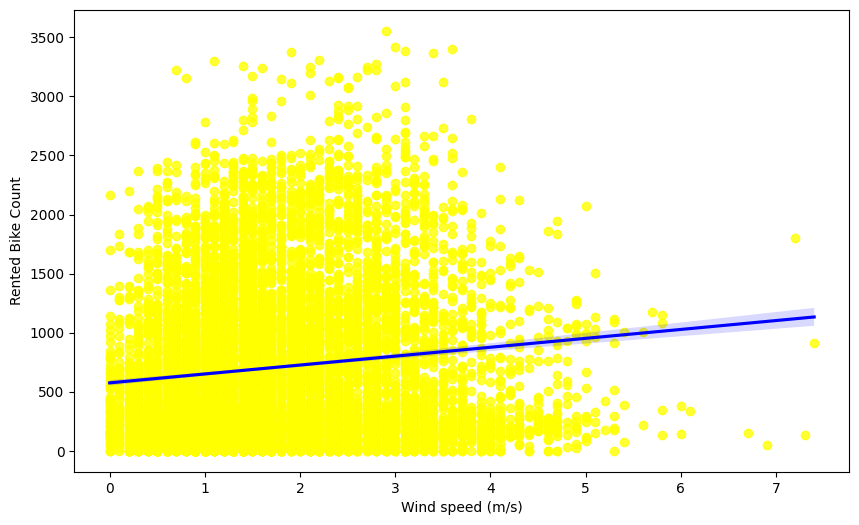

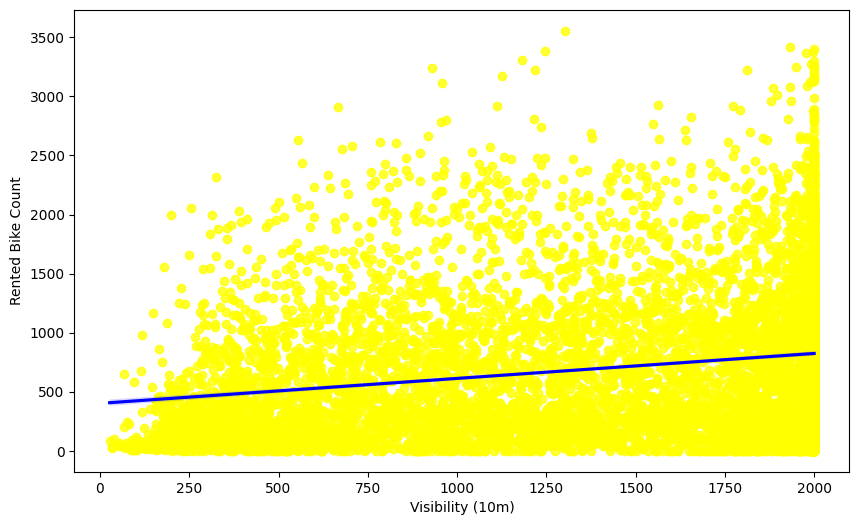

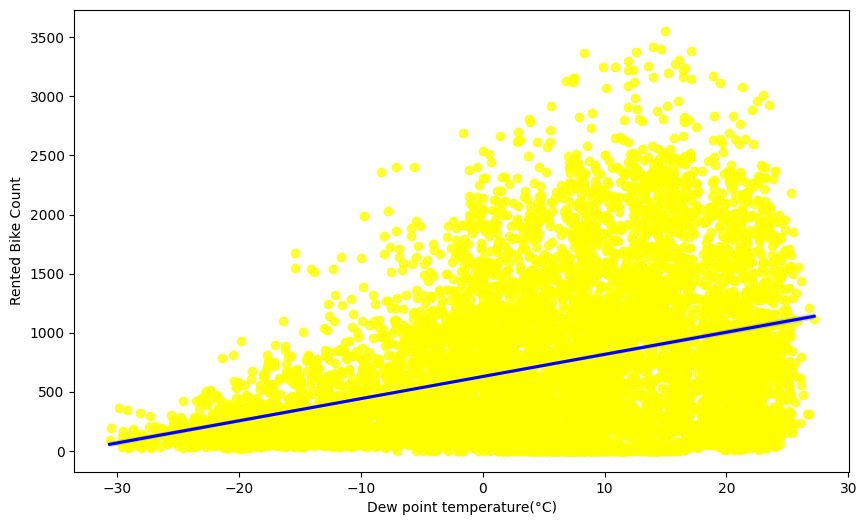

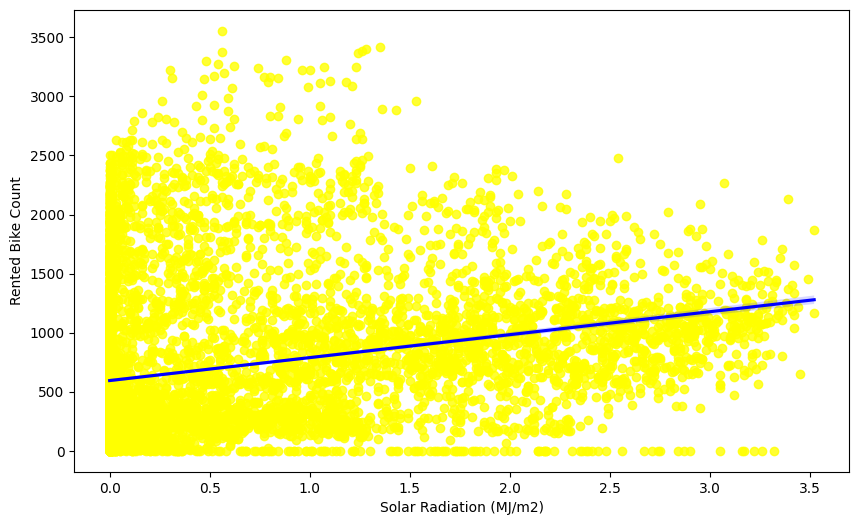

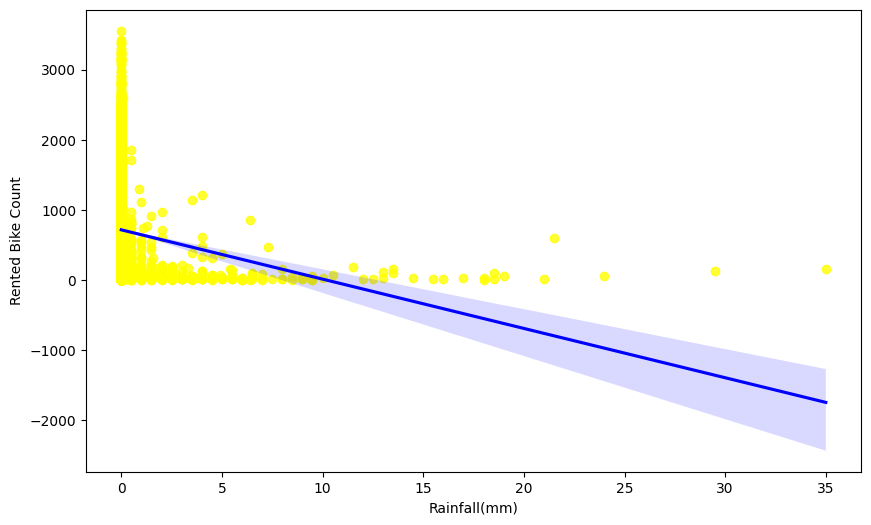

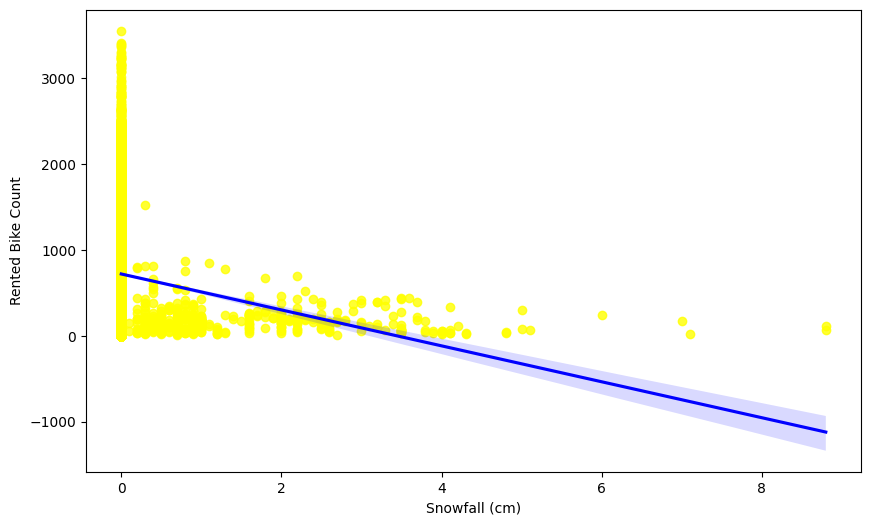

In [39]:
#printing the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented Bike Count'],scatter_kws={"color": 'yellow'}, line_kws={"color": "blue"})

##Handling  outliers

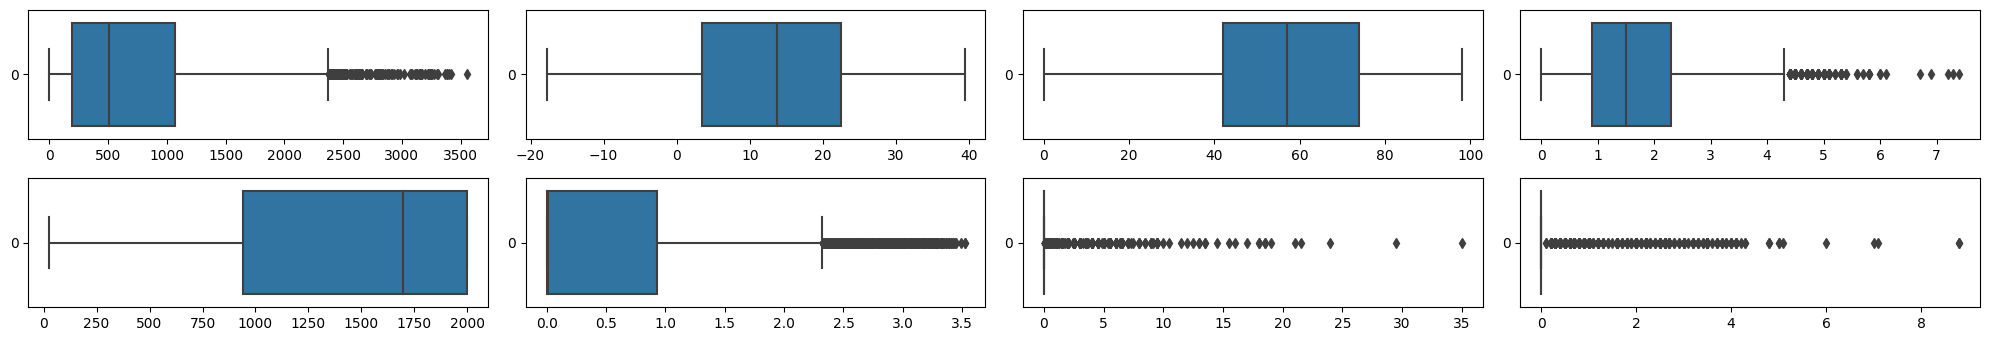

In [117]:
# looking for outliers of every feature of dataset with the help of boxplot
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1

for col in df.describe().columns:
    plt.subplot(6,4,num_it)
    sns.boxplot(df[col],  orient='h')
    num_it+=1

plt.tight_layout()

* Rented Bike count contains outliers so we only need to remove this outliers.

* Wind Speed, Solar Radiation, Rainfall, and Snowfall contains outlier values which are acceptable.

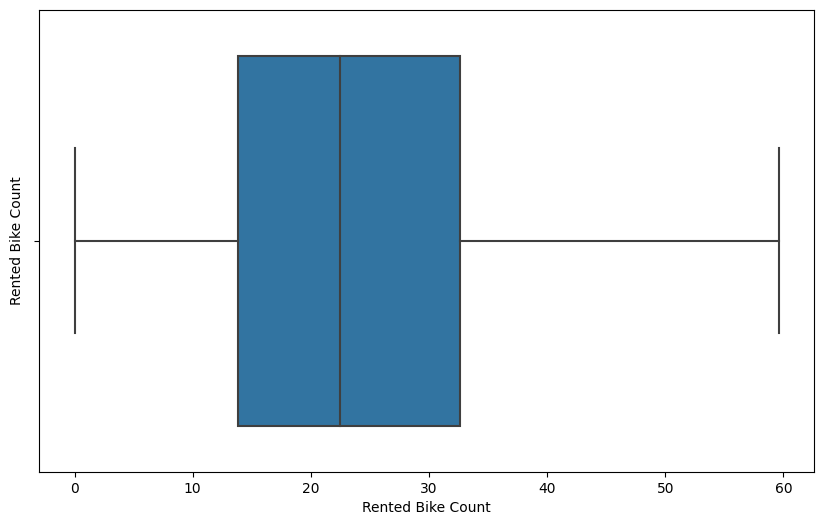

In [43]:
# After applying square root on Rented Bike Count check whether we still have outliers
plt.figure(figsize=(10,6))

plt.ylabel('Rented Bike Count')
sns.boxplot(x=np.sqrt(df['Rented Bike Count']))
plt.show()

## **Normalise Rented Bike Count column data**

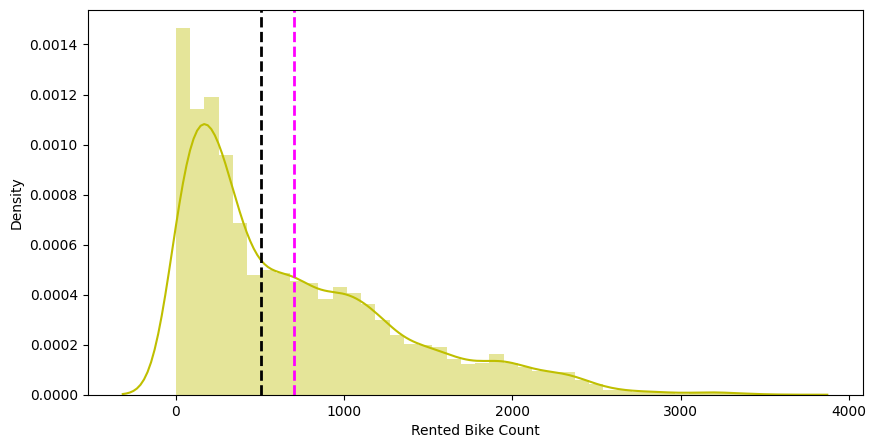

In [41]:
# Distribution plot of Rented Bike Count
plt.figure(figsize=(10,5))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
ax=sns.distplot(df['Rented Bike Count'],hist=True ,color="y")
ax.axvline(df['Rented Bike Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['Rented Bike Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

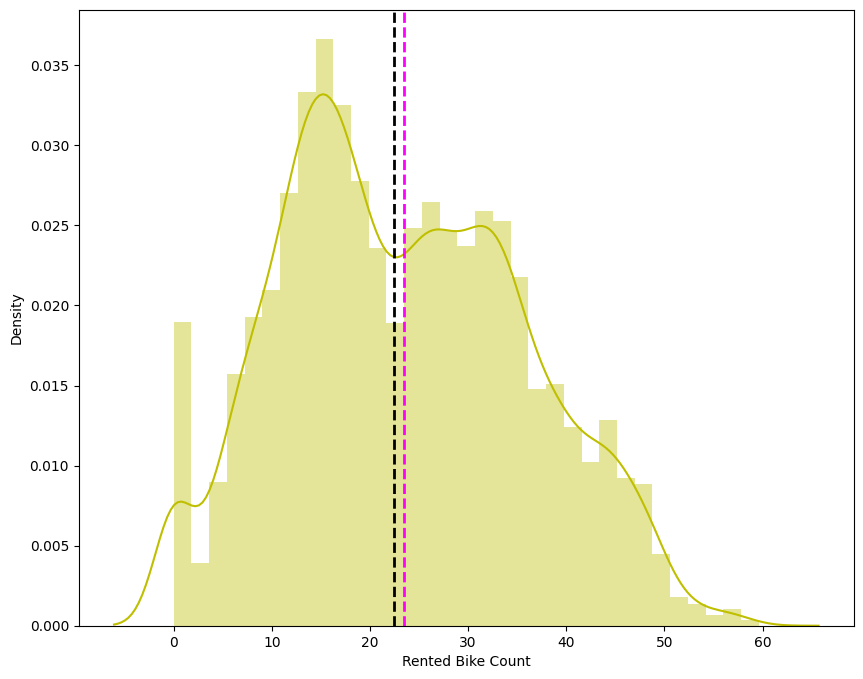

In [42]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rented Bike Count']), color="y")
ax.axvline(np.sqrt(df['Rented Bike Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Rented Bike Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

## **Check Correlation**

In [44]:
df.corr()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Temperature(°C),0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


#### Correlation Heatmap

<Axes: >

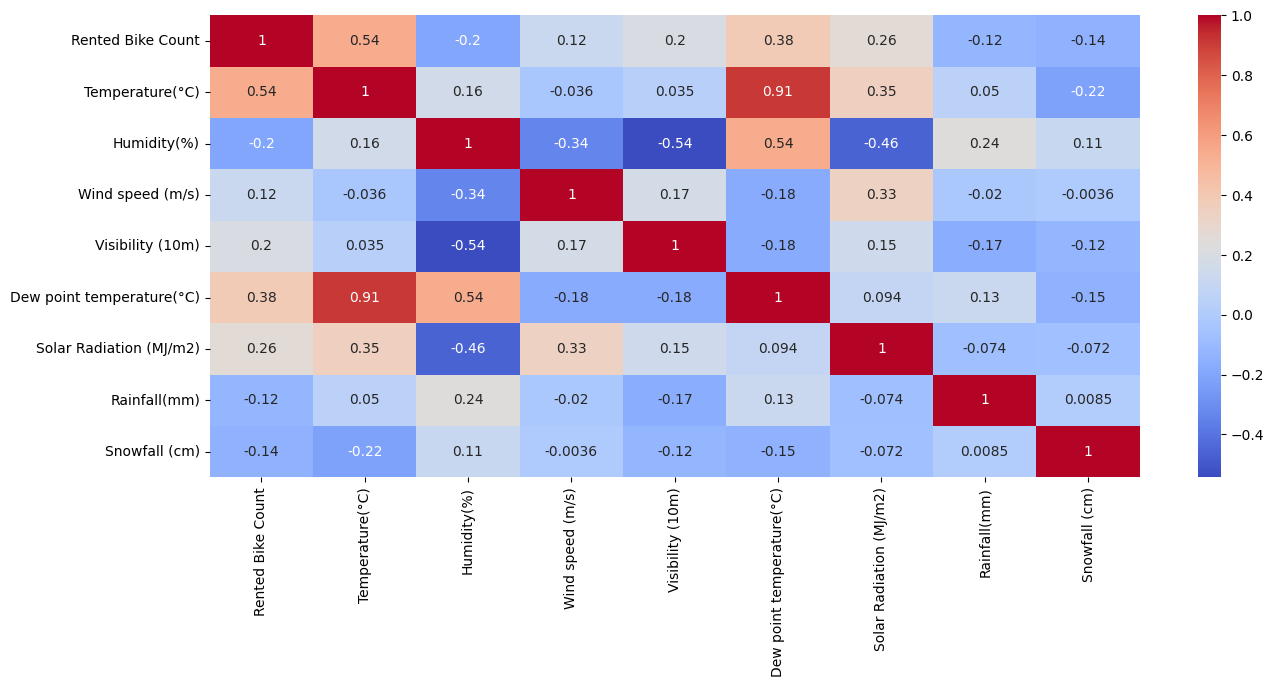

In [45]:
# Correlation Heatmap visualization code
## plot the Correlation matrix
plt.figure(figsize=(15,6))
correlation=df.corr()
sns.heatmap((correlation), annot=True,cmap='coolwarm')

***We can observe on the heatmap that on the rental_bike_count line the most positively correlated variables to the rent are :***

* the temperature
* the dew point temperature
* the solar radiation

***And most negatively correlated variables are:***
* Humidity
* Rainfall
* Snowfall


* ***From the above correlation heatmap, We see that there is a positive
correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it dont affects the outcome of our analysis. And they have the same variations.. so we can drop the column 'Dew point temperature(°C)'.***

In [46]:
#drop the Dew point temperature column
df = df.drop(['Dew point temperature(°C)'],axis=1)

# Deal with multicollinearity

In [47]:
#  Multicollinearity from variation infletion factor.

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [48]:
# multicollinearity result.

calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count',"date"]]])

,variables,VIF
0,Temperature(°C),3.166007
1,Humidity(%),4.758651
2,Wind speed (m/s),4.079926
3,Visibility (10m),4.409448
4,Solar Radiation (MJ/m2),2.246238
5,Rainfall(mm),1.078501
6,Snowfall (cm),1.118901


In [49]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Temperature(°C)','Dew point temperature(°C)']]])

,variables,VIF
0,Rented Bike Count,2.458317
1,Humidity(%),3.557047
2,Wind speed (m/s),3.955300
3,Visibility (10m),4.701954
4,Solar Radiation (MJ/m2),1.810801
5,Rainfall(mm),1.087762
6,Snowfall (cm),1.063749


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Rented Bike Count        8760 non-null   int64   
 1   Hour                     8760 non-null   category
 2   Temperature(°C)          8760 non-null   float64 
 3   Humidity(%)              8760 non-null   int64   
 4   Wind speed (m/s)         8760 non-null   float64 
 5   Visibility (10m)         8760 non-null   int64   
 6   Solar Radiation (MJ/m2)  8760 non-null   float64 
 7   Rainfall(mm)             8760 non-null   float64 
 8   Snowfall (cm)            8760 non-null   float64 
 9   Seasons                  8760 non-null   object  
 10  Holiday                  8760 non-null   object  
 11  Functioning Day          8760 non-null   object  
 12  month                    8760 non-null   category
 13  weekdays weekend         8760 non-null   category
dtypes: categ

## Create the dummy variables

**A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.**

In [51]:
#Assign all categorical features to a variable
categorical_features=list(df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'month',
       'weekdays weekend'],
      dtype='object')

###one hot encoding

**A one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.**

In [52]:
#creat a copy
df_copy = df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    df_copy = one_hot_encoding(df_copy, col)
df_copy.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


#**Model Training**

##**Train Test split for regression**

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

In [53]:
#Assign the value in X and Y
X = df_copy.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(df_copy['Rented Bike Count'])

In [54]:
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


In [55]:
df_copy.describe().columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11',
       'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17',
       'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning Day_Yes', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'weekdays weekend_1'],
      dtype='object')

# **LINEAR REGRESSION**

In [56]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [57]:
#check the score
reg.score(X_train, y_train)

0.7557884266778845

In [58]:
#check the coefficeint
reg.coef_

array([ 4.76592857e-01, -1.37389872e-01, -1.45055135e-01,  5.60074648e-04,
        1.09746012e+00, -1.47539559e+00,  1.91445977e-02, -1.98243149e+00,
       -5.02829279e+00, -7.33272935e+00, -9.57684190e+00, -9.14567640e+00,
       -4.15101144e+00,  2.10516425e+00,  7.21001444e+00,  9.18589247e-01,
       -3.49505813e+00, -3.79366402e+00, -3.07652970e+00, -3.28984917e+00,
       -3.46328474e+00, -2.12611279e+00,  2.63457209e-02,  3.81196406e+00,
        1.02756294e+01,  6.86306739e+00,  6.21187858e+00,  6.33587517e+00,
        5.07654627e+00,  1.45916926e+00, -2.62867121e+00, -3.38160787e+00,
       -6.54244484e+00,  2.95423516e+00,  2.77747454e+01, -8.06203753e-01,
        2.64506479e-01,  3.22771507e-01,  1.45208025e+00,  4.35283784e+00,
       -1.95727651e-01, -7.51151800e-01,  3.32783165e-01,  2.19197225e+00,
        1.08610102e+00,  1.19136471e+00, -7.27039129e-01])

In [59]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [94]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 36.64474647323366
RMSE : 6.053490437196846
MAE : 4.658361507344823
R2 : 0.7680218977120629
Adjusted R2 : 0.7629318086329158


**The r2_score for the test set is 0.76. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [96]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict1,index=[1])

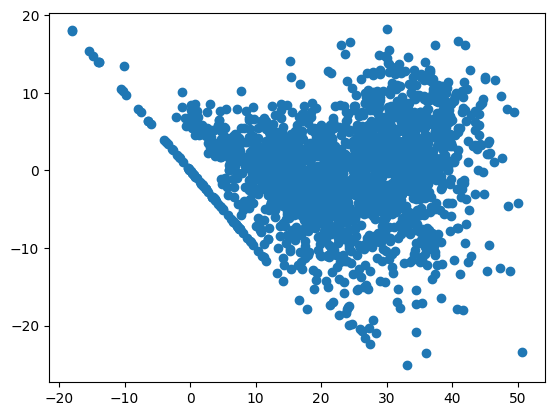

In [61]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

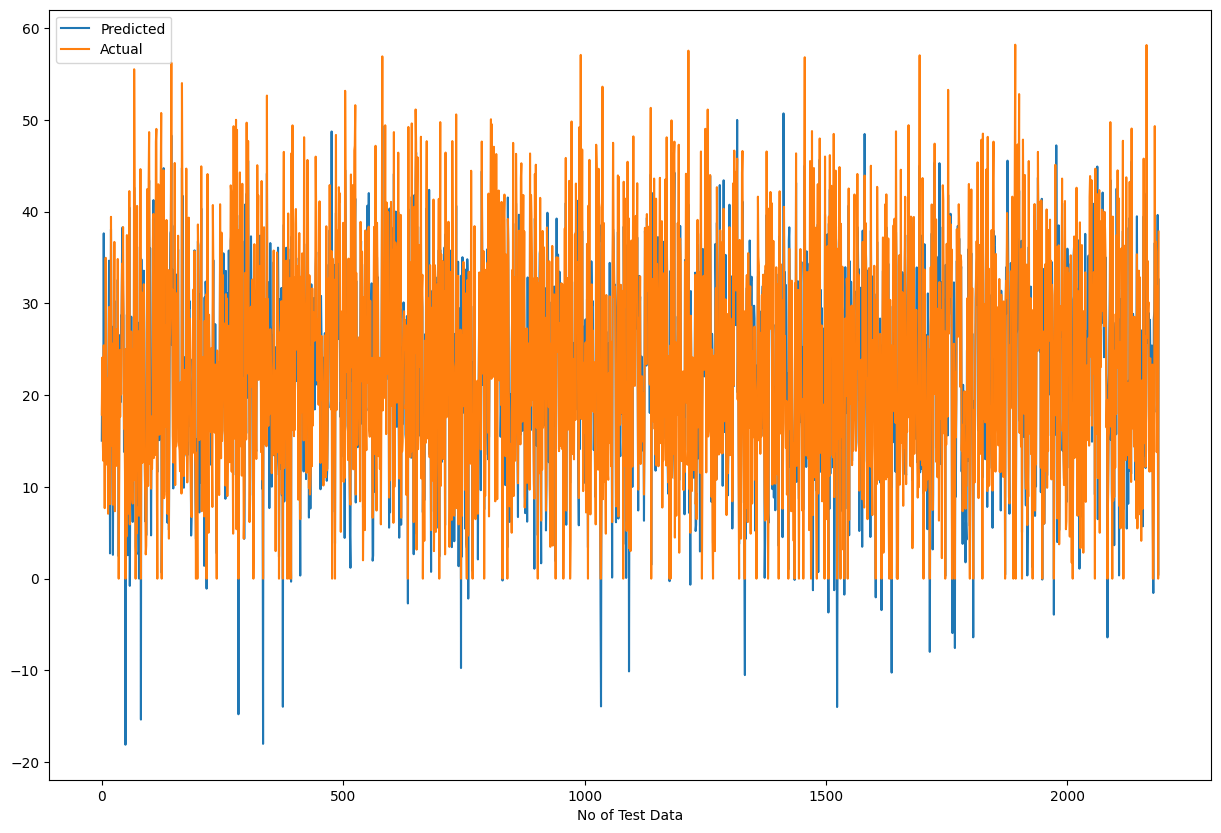

In [62]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

#**LASSO REGRESSION**

In [64]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.3873692800799008 0.40519624904934015


In [65]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [97]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 96.7750714044618
RMSE : 9.837432155011886
MAE : 7.455895061963607
R2 : 0.3873692800799008
Adjusted R2 : 0.37392686932535146


**The r2_score for the test set is 0.38. This means our linear model is  not performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**


In [98]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict1,ignore_index=True)

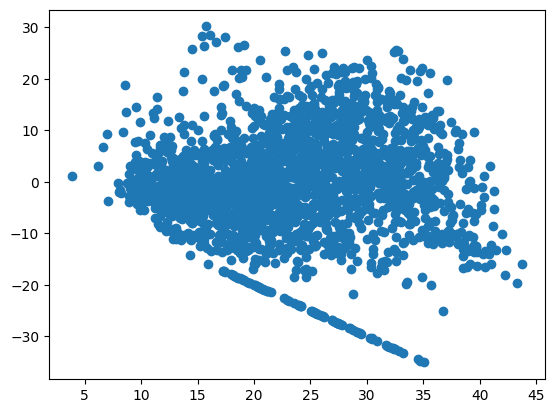

In [67]:
### Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

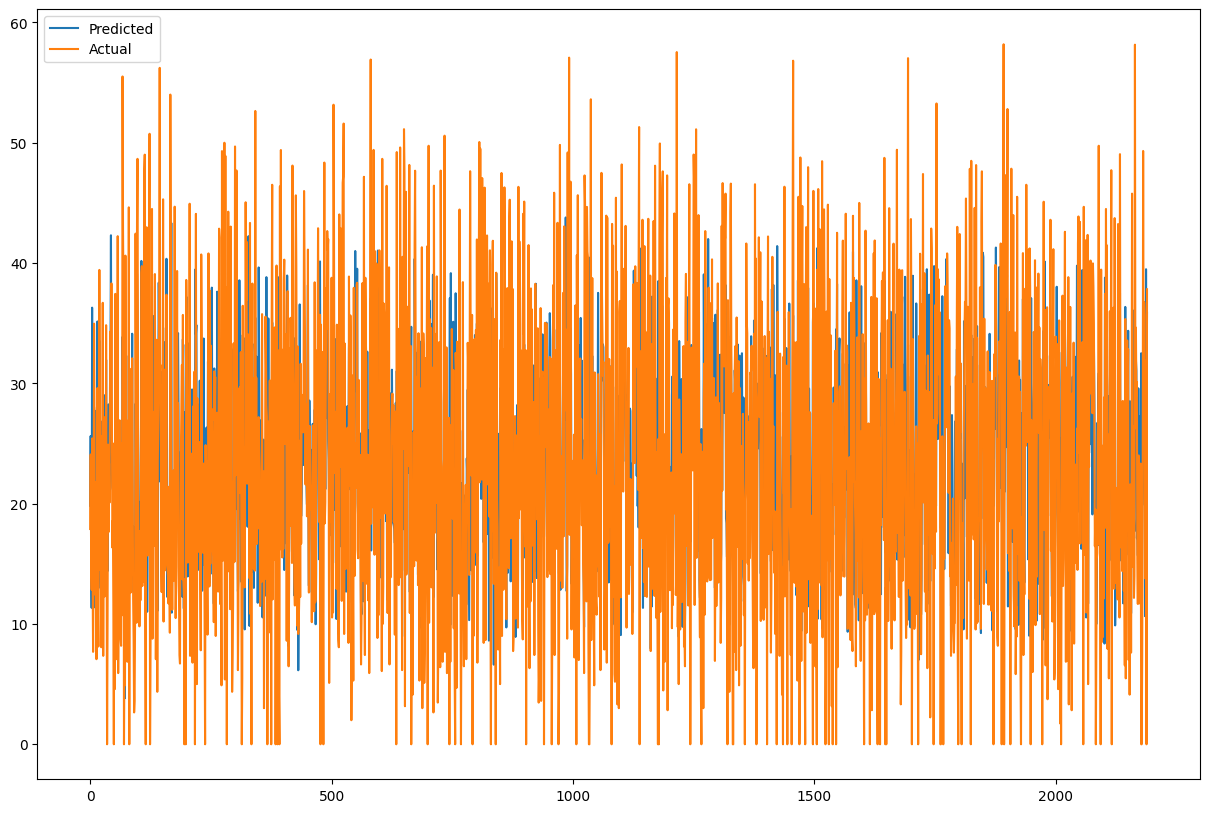

In [68]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [69]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict1,index=[1])

# **RIDGE REGRESSION**

In [70]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [71]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [72]:
#check the score
ridge.score(X_train, y_train)

0.7557883433655243

In [73]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [99]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 36.646577616668694
RMSE : 6.053641682216473
MAE : 4.658618929538894
R2 : 0.7680103057317668
Adjusted R2 : 0.7629199623001108


The r2_score for the test set is 0.78. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [100]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict1,ignore_index=True)

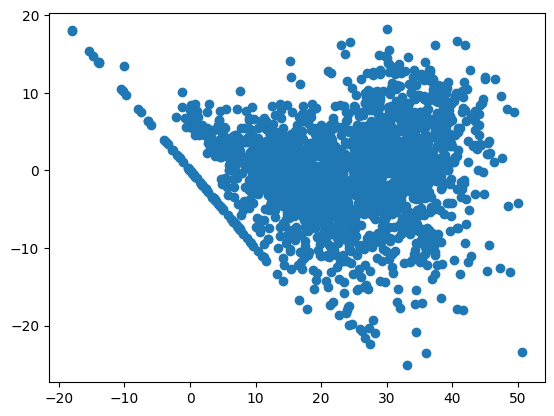

In [75]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

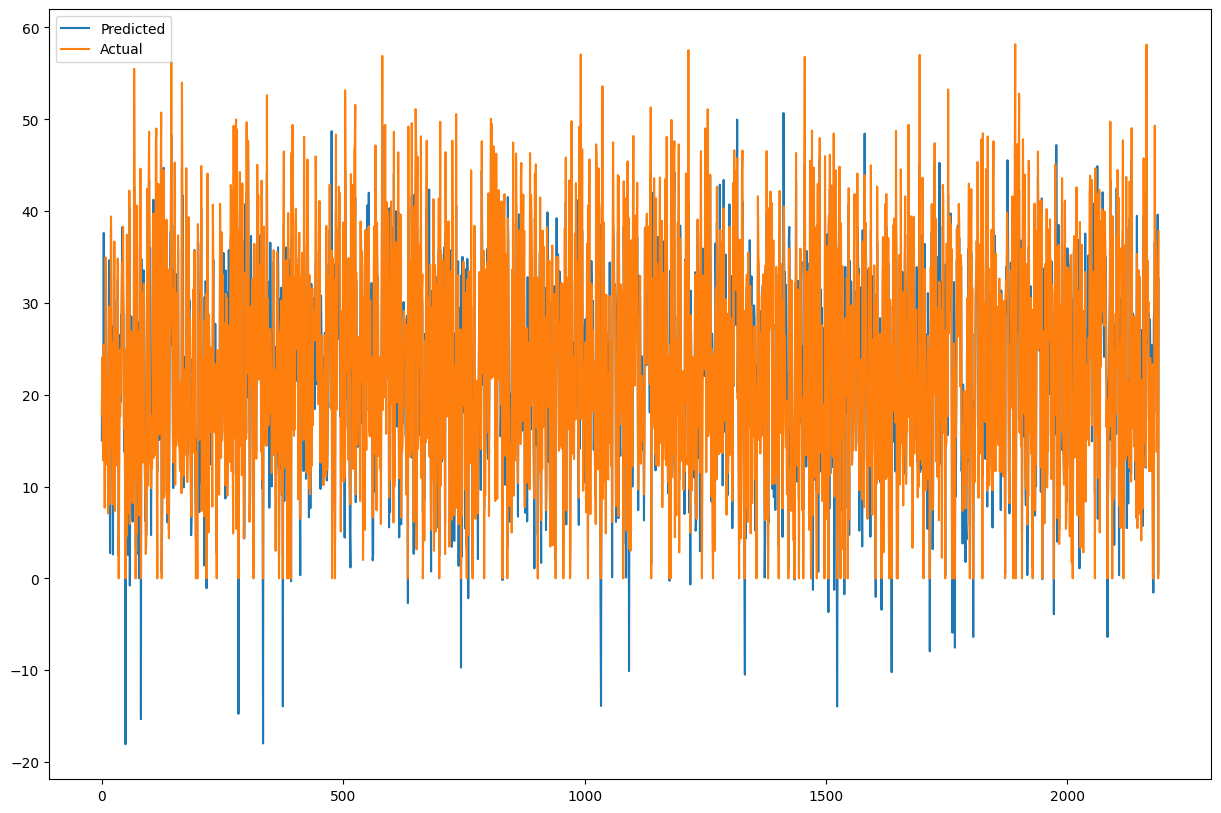

In [76]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **ELASTIC NET REGRESSION**

In [77]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [78]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [79]:
#check the score
elasticnet.score(X_train, y_train)

0.6152557713637432

In [80]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [101]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 61.65141449800951
RMSE : 7.851841471782878
MAE : 6.0107752888670705
R2 : 0.6097181856869531
Adjusted R2 : 0.601154579117059


In [103]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict1,ignore_index=True)

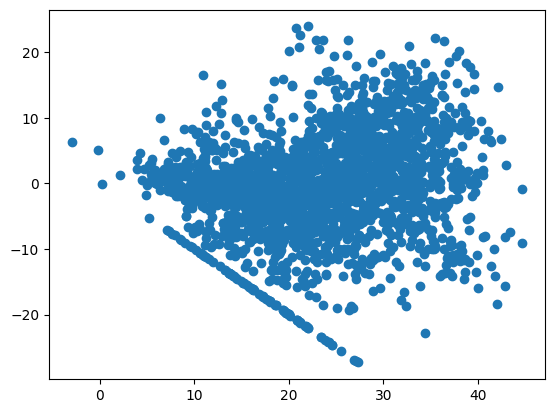

In [82]:
### Heteroscadacity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

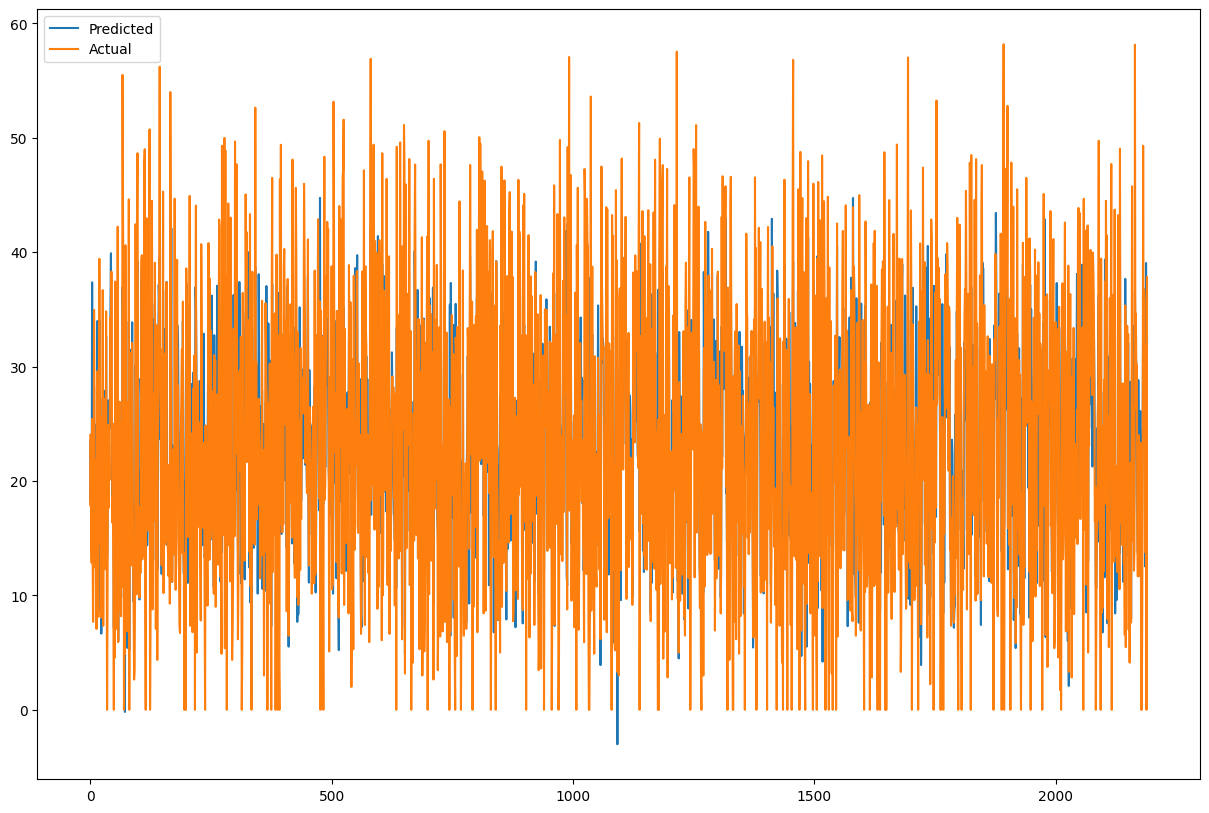

In [83]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **DECISION TREE**

In [84]:
#import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='friedman_mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [85]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [104]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 52.297632051583896
RMSE : 7.231710174750084
MAE : 5.428142088188419
R2 : 0.6689319314477804
Adjusted R2 : 0.6616675994113872


**The r2_score for the test set is 0.66. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [105]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict1,ignore_index=True)

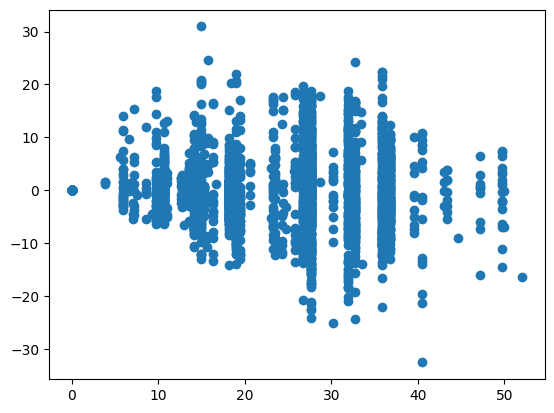

In [87]:
### Heteroscadacity
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))

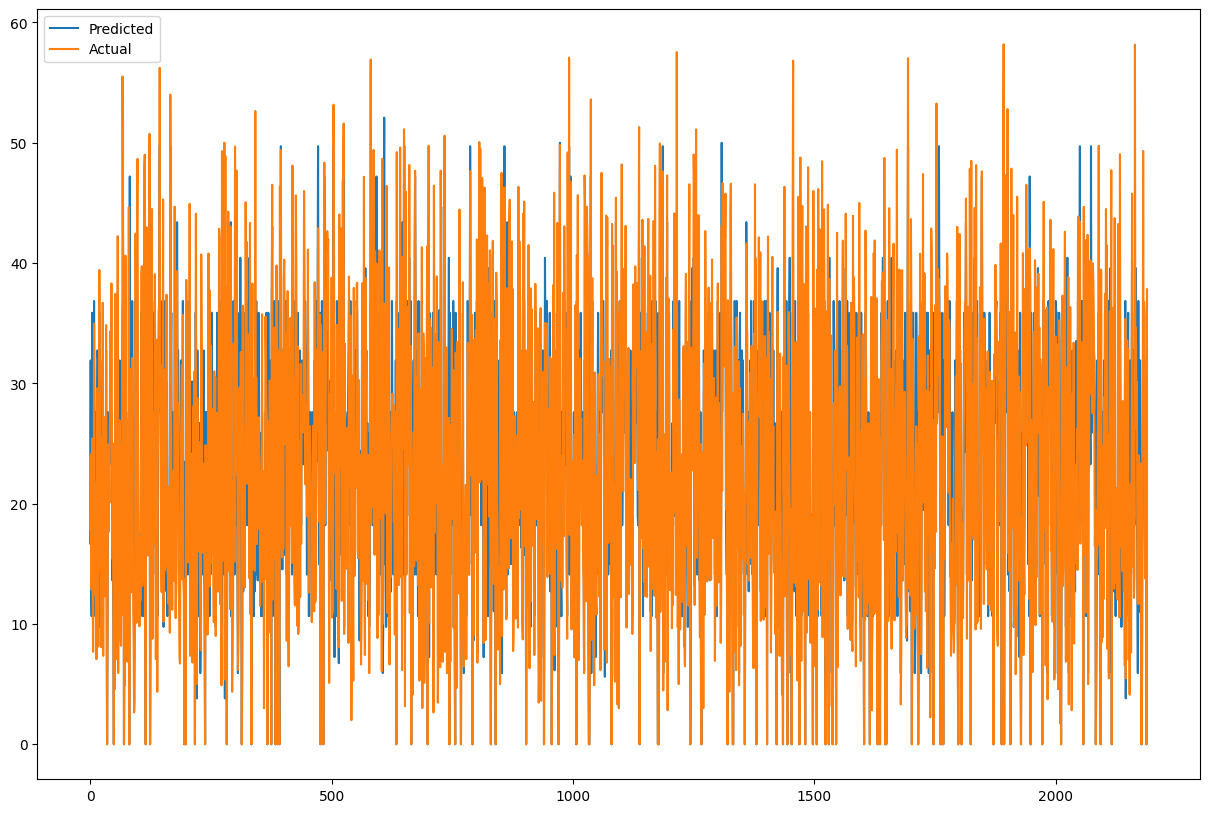

In [88]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **RANDOM FOREST**

In [89]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [90]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [106]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 15.899375316956544
RMSE : 3.9874020761589297
MAE : 2.578439114414792
R2 : 0.8993496403015017
Adjusted R2 : 0.8971411590196019


**The r2_score for the test set is 0.91. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [107]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict1,ignore_index=True)

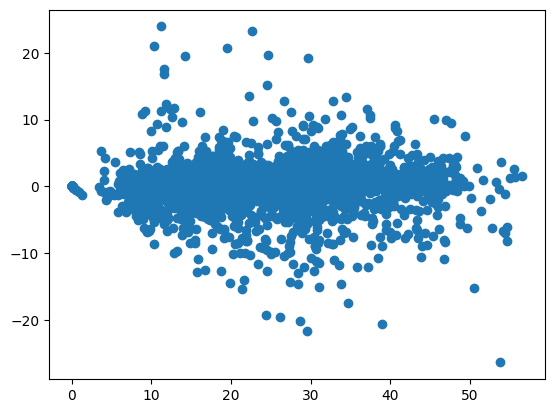

In [92]:
### Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))

# **GRADIENT BOOSTING**

In [108]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [109]:
# Making predictions on train and test data

y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)

In [110]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 23.68712054123081
RMSE : 4.8669416003513755
MAE : 3.6680435591387774
R2 : 0.8500496305566213
Adjusted R2 : 0.8467594030291522


In [112]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
test_df=test_df.append(dict1,ignore_index=True)

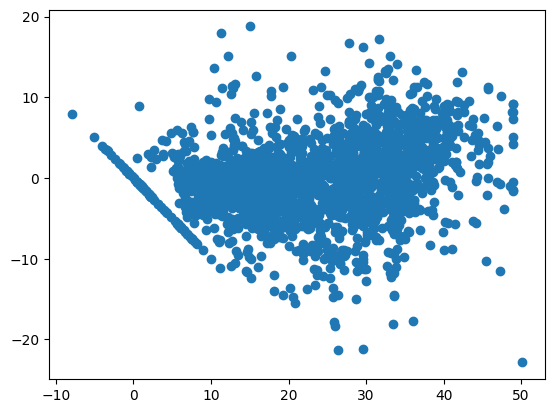

In [113]:
### Heteroscadacity
plt.scatter((y_pred_test_g),(y_test)-(y_pred_test_g))

##**Visualising the evaluatin matrix to choose from the above created models as our final prediction model**

In [116]:
# displaying the results of evaluation metric values for all models
result=pd.concat([test_df],keys=['Test set'])
result

Model    MAE     MSE   RMSE  R2_score  \
Test set 0             Linear regression   4.658  36.645  6.053     0.768   
         1              Lasso regression   7.456  96.775  9.837     0.387   
         2              Ridge regression   4.659  36.647  6.054     0.768   
         3    Elastic net regression Test  6.011  61.651  7.852     0.610   
         4    Elastic net regression Test  6.011  61.651  7.852     0.610   
         5      Dicision tree regression   5.428  52.298  7.232     0.669   
         6      Random forest regression   2.578  15.899  3.987     0.899   
         7  Gradient boosting regression   3.668  23.687  4.867     0.850   
         8  Gradient boosting regression   3.668  23.687  4.867     0.850   

            Adjusted R2  
Test set 0         0.76  
         1         0.37  
         2         0.76  
         3         0.60  
         4         0.60  
         5         0.66  
         6         0.90  
         7         0.85  
         8         0.85

# **Conclusion:-**



#Conclusion : - ML model
In conclusion, a machine learning model for predicting bike sharing demand can be developed using various algorithms such as linear regression, decision trees, and random forests. The model's performance can be evaluated using metrics such as mean absolute error and mean squared error. The key features that influence demand, such as temperature, humidity, and time of day, can be used as input variables for the model. Additionally, incorporating external data sources, such as weather forecasts and event schedules, can improve the accuracy of the model. However, it is also important to note that the model should be regularly retrained and updated with new data to ensure its continued performance.

* Linear model, Lasso model, Ridge model,Elasticnet and polynomial model have Adjusted-R2 value below 65%.

* According to Decision tree and random forest tests, temperature is the most important feature and has the highest impact on rented bike demand.

* On the basis of R2 and Adjusted-R2, Decision tree, Random Forest and gradient boost model are best as the accuracy of these models are above 75% and also their Adjusted-R2 values are less than R2 values.

* Random forest model's R2 and Adjusted-R2 values are 0.822 and 0.821 respectively.


#Conclusion :- EDA

* The  highest demand for rental bikes was noted in June.
* Summer is the busiest season in regards to rented bike demand Peak demand for rented bike is around 6pm (18:00).
* Rented bike demand is less during winter season, in comparison to other seasons .
* On working day, the rental bike demand is high in comparison to holiday